In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## Exercise 1 
We can store the prices in a vector $\underline{a}$ and then use the numpy matmul function to calculate the revenue at each timepoint

In [2]:
# Construct the units sold matrix (as given in the main text)
X = np.array([[10,1,1,2,25],
              [12,0,2,5,23],
              [7,1,4,9,18],
              [3,2,7,2,10],
              [5,1,15,4,3]])

# Construct the prices vector a. We'll apply the matrix X to this vector
a = np.array([1.25, 2.40, 1.75, 4.70, 0.5])

# Calculate the total revenue at each timepoint by multiplying units by price and summing up.
revenue = np.matmul(X, a)

## Exercise 2 
The $10\times 10$ matrix is held in the file Data/Data_Q2_Chap3.csv in the repository. We can use the numpy.linalg.eigh to calculate the eigen-decomposition of the real symmetric matrix.

In [3]:
## Read in the raw data into a pandas dataframe.
X = pd.read_csv('./Data/Data_Q2_Chap3.csv', header=None).to_numpy()

In [4]:
# Calculate the eigen-decomposition
eigvals, eigvecs = np.linalg.eigh(X)

If we approximate $\underline{\underline{X}}$ by retaining $K$ eigenvectors, we calculate this approximation using the formula,
$\underline{\underline{X}}^{(approx)}\;=\;\sum_{i=1}^{K}\lambda_{i}\underline{v}_{i} \underline{v}_{i}^{\top}$.

In [5]:
# Initialize an empty 10x10 matrix to hold the approximation
X_approx = np.zeros(X.shape)

# Construct the approximation by adding the 
# contributions from the first two eigenvectors

# Set the number of retained eigenvectors
n_retained_eigs = 2
for i in range(n_retained_eigs):
    X_approx += eigvals[i]*np.outer(eigvecs[:, i], eigvecs[:, i])

Once we calculate the discrepancy matrix $\underline{\underline{Dis}}\;=\;\underline{\underline{X}} - \underline{\underline{X}}^{(approx)}$ we can calculate the RMSE using the expression $\sum_{ij} Dis^{2}_{ij}\;=\; \sum_{i} \sum_{j} Dis_{ij} Dis^{\top}_{ji}\;=\;\sum_{i} \left ( \underline{\underline{Dis}} \underline{\underline{Dis}}^{\top}\right )_{ii}\;=\;\mathrm{tr} \left ( \underline{\underline{Dis}} \underline{\underline{Dis}}^{\top}\right )$

In [6]:
# Calculate the discrepancy matrix between the original
# matrix and the approximation
discrepancy  = X - X_approx

# Calculate the Root-Mean-Square error
rmse = np.sqrt(np.trace(np.matmul(discrepancy, np.transpose(discrepancy)))) / X.shape[0]

print("RMSE error = ", rmse)

RMSE error =  1.3038404810112136


## Exercise 3

In [7]:
## Read in the raw data into a pandas dataframe.
mouse_proteomics = pd.read_csv('./Data/Data_Cortex_Nuclear.csv')

We'll take a quick look at the data

In [8]:
mouse_proteomics.head(10)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,1.044979,0.831557,0.188852,0.106305,0.427099,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,1.009883,0.849270,0.200404,0.106592,0.441581,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.996848,0.846709,0.193685,0.108303,0.435777,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.990225,0.833277,0.192112,0.103184,0.391691,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.997775,0.878668,0.205604,0.104784,0.434154,1.839730,Control,Memantine,C/S,c-CS-m
5,309_6,0.447506,0.628176,0.367388,2.385939,4.807635,0.218578,0.176233,2.141282,0.195188,...,0.920178,0.843679,0.190469,0.106476,0.439833,1.816389,Control,Memantine,C/S,c-CS-m
6,309_7,0.428033,0.573696,0.342709,2.334224,4.473130,0.225173,0.184004,2.012414,0.195789,...,1.028770,0.798284,0.181610,0.097834,0.406293,1.528484,Control,Memantine,C/S,c-CS-m
7,309_8,0.416923,0.564036,0.327703,2.260135,4.268735,0.214834,0.179668,2.007985,0.189803,...,0.943544,0.843966,0.191561,0.099494,0.382532,1.652658,Control,Memantine,C/S,c-CS-m
8,309_9,0.386311,0.538428,0.317720,2.125725,4.063950,0.207222,0.167778,1.861514,0.180684,...,0.946910,0.832182,0.186378,0.105145,0.435687,1.834599,Control,Memantine,C/S,c-CS-m
9,309_10,0.380827,0.499294,0.362462,2.096266,3.598587,0.227649,0.188093,1.717861,0.188093,...,0.970324,0.803395,0.189523,0.093300,0.414793,1.516862,Control,Memantine,C/S,c-CS-m


We'll convert the data to a numpy 2D array and fit a scikit-learn PCA object to the datamatrix. We'll keep all the principal components for now, so that we can calculate percentage of variance captured by each principal component.

In [9]:
X = mouse_proteomics.iloc[:, 1:(mouse_proteomics.shape[1]-4)].to_numpy()
pca = PCA()
pca.fit(X)

PCA()

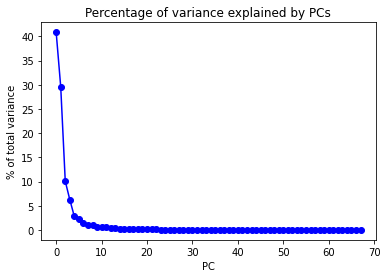

In [10]:
## Let's look at the percentage of variance explained by each PC

# Convert standard deviations into variances
pc_variance = np.power(pca.singular_values_, 2.0)

# Calculate total variance
total_variance = np.sum(pc_variance)

# Calculate percentage of total variance
pc_percent_total_variance = 100.0*pc_variance / total_variance

# Plot 
plt.plot(pc_percent_total_variance, color='b', marker='o')
plt.title('Percentage of variance explained by PCs')
plt.xlabel('PC')
plt.ylabel('% of total variance')
plt.show()

From the plot above we can see that the first 2 principal components capture over 70% of the total variation in the original data. So we can reduce the dimensionality significantly, if we wanted to, by just retaining PC1 and PC2. For now, we'll just plot the scores of the first two PCs. First we must calculate the scores.

In [11]:
scores = pca.transform(X)

We'll plot the scores from PC2 against the scores from PC1. We'll colour the points according to which behavior class they belong to. 

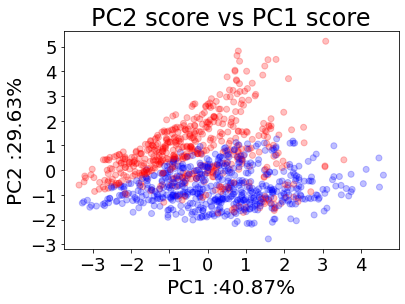

In [12]:
colors = np.full(scores.shape[0], 'blue')
colors[np.array(mouse_proteomics['Behavior'].values=='C/S')] = 'red'
plt.scatter(scores[:, 0], scores[:,1], c=colors, alpha=0.25)
plt.title('PC2 score vs PC1 score', fontsize=24)
plt.xlabel('PC1 :' + str(round(pc_percent_total_variance[0],2)) + '%', fontsize=20)
plt.ylabel('PC2 :' + str(round(pc_percent_total_variance[1],2)) + '%', fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

The plot above shows that the 2nd principal component, in particular, helps to distinguish the two different behavior classes.